**Assignment 1 Spec:**

Assuming a risk-free rate of 1.595%, use the information in these files and what we have discussed in class to complete the following:

1. Compute the alpha and beta for each stock in your industry group and store these in a dataframe as ‘alpha’ and ‘beta’.
2. Which stock had the highest and which had the lowest alpha?
3. Use describe to print summary statistics. Is the mean alpha zero?  If not, why not?
4. Now retrieve prices and returns for the same firms (if available) for 2021. Does having a high alpha in 2020 predict a high return in 2021?

In [1]:
#imports
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime as dt
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 800

import seaborn as sns
sns.set()


In [39]:



RFR = 0.01595

# Verify tickers (some have been delisted or don't exist during the period in question)
df=pd.read_csv("HeaderGroup10.csv")
curr_tickers = pd.read_csv("nasdaqlisted.txt", delimiter='|')['Symbol']
df = df[df.tic.isin(curr_tickers)]
df.reset_index(inplace = True)
df.drop("index", axis = 1, inplace = True)

# Add 2020 Return
def get_2020_return(ticker):
  data = yf.download(ticker, start = '2020-1-1', end = '2021-1-1')["Adj Close"]
  return (data[-1] - data[0])/data[0]

df["2020 Return"] = df.tic.apply(lambda x : get_2020_return(x))

# Clean up index timeseries to have datetime
index = pd.read_csv("IndexProjectGroup10.csv")
index["DATE"] = index["DATE"].apply(lambda a : dt.strptime(str(a), '%Y%m%d'))
index.set_index("DATE", inplace = True)
index.index.rename("Date", inplace = True)

index_return = (1+index['RET']).prod()-1

# Returns numpy series
def get_daily_return(ticker : str, start_date = "2019-12-31", end_date = "2021-1-1"):
  data = yf.download(ticker, start = start_date, end = end_date)["Adj Close"].pct_change()
  return data[1:]

# From slides
def get_greeks(stock_return_series, index_return_series = index['RET']):
  common_dates = index_return_series.index.intersection(stock_return_series.index)
  x = index_return_series[common_dates]
  y = stock_return_series[common_dates]
  x = sm.add_constant(x)
  model = sm.OLS(y,x)
  results = model.fit()
  return results.params
  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [43]:
df['beta'] = df['tic'].apply(lambda x : get_greeks(get_daily_return(x))["RET"])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [44]:
df["alpha"] = (df["2020 Return"] - RFR) - df["beta"] * (index_return - RFR)

In [45]:
#1. Compute alpha and beta
df

,ggroup,conm,tic,2020 Return,beta,alpha
0,4010,AMERIS BANCORP,ABCB,-0.087288,1.251639,0.051849
1,4010,ALLEGIANCE BANCSHARES INC,ABTX,-0.076929,1.055000,0.037842
2,4010,ATLANTIC CAP BANCSHARES INC,ACBI,-0.127910,1.124131,-0.004573
3,4010,ACNB CORP,ACNB,-0.298293,1.193996,-0.166299
4,4010,AFFINITY BANCSHARES INC,AFBI,-0.153208,0.205581,-0.143685
...,...,...,...,...,...,...
293,4010,WSFS FINANCIAL CORP,WSFS,0.035803,1.142596,0.161429
294,4010,WEST BANCORPORATION INC,WTBA,-0.208680,0.867600,-0.117128
295,4010,WINTRUST FINANCIAL CORP,WTFC,-0.119836,1.278367,0.022612
296,4010,WVS FINANCIAL CORP,WVFC,-0.079990,0.157746,-0.076395


In [46]:
#2. Max Alpha
print("Max Alpha")
print(df.loc[df['alpha'].idxmax()])

print('')

# Min Alpha
print("Min Alpha")
print(df.loc[df['alpha'].idxmin()])

Max Alpha
ggroup                        4010
conm           MR COOPER GROUP INC
tic                           COOP
2020 Return                1.53928
beta                      1.057713
alpha                     1.654388
Name: 63, dtype: object

Min Alpha
ggroup                          4010
conm           CARTER BANKSHARES INC
tic                             CARE
2020 Return                -0.513878
beta                        1.247567
alpha                      -0.375246
Name: 37, dtype: object


In [47]:
# 3.
df.describe()

,ggroup,2020 Return,beta,alpha
count,298.0,298.000000,298.000000,298.000000
mean,4010.0,-0.119826,0.845784,-0.030978
std,0.0,0.221861,0.308189,0.219338
min,4010.0,-0.513878,0.054554,-0.375246
25%,4010.0,-0.236068,0.695589,-0.148932
50%,4010.0,-0.156183,0.925172,-0.063002
75%,4010.0,-0.063199,1.060616,0.021717
max,4010.0,1.539280,1.375280,1.654388


3. The mean alpha is not zero but slightly negative. In general, the unweighted mean alpha of all tickers in an industry group will not equal zero as the index itself is probably not weighted equally between the different tickers. 

4. Now retrieve prices and returns for the same firms (if available) for 2021. Does having a high alpha in 2020 predict a high return in 2021?

In [48]:
def get_2021_return(ticker):
  data = yf.download(ticker, start = '2021-01-01', end = '2021-12-31')["Adj Close"]
  return (data[-1] - data[0])/data[0]

df['2021 Return'] = df.tic.apply(get_2021_return)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[Text(0.5, 1.0, 'Alpha vs 2021 Return')]

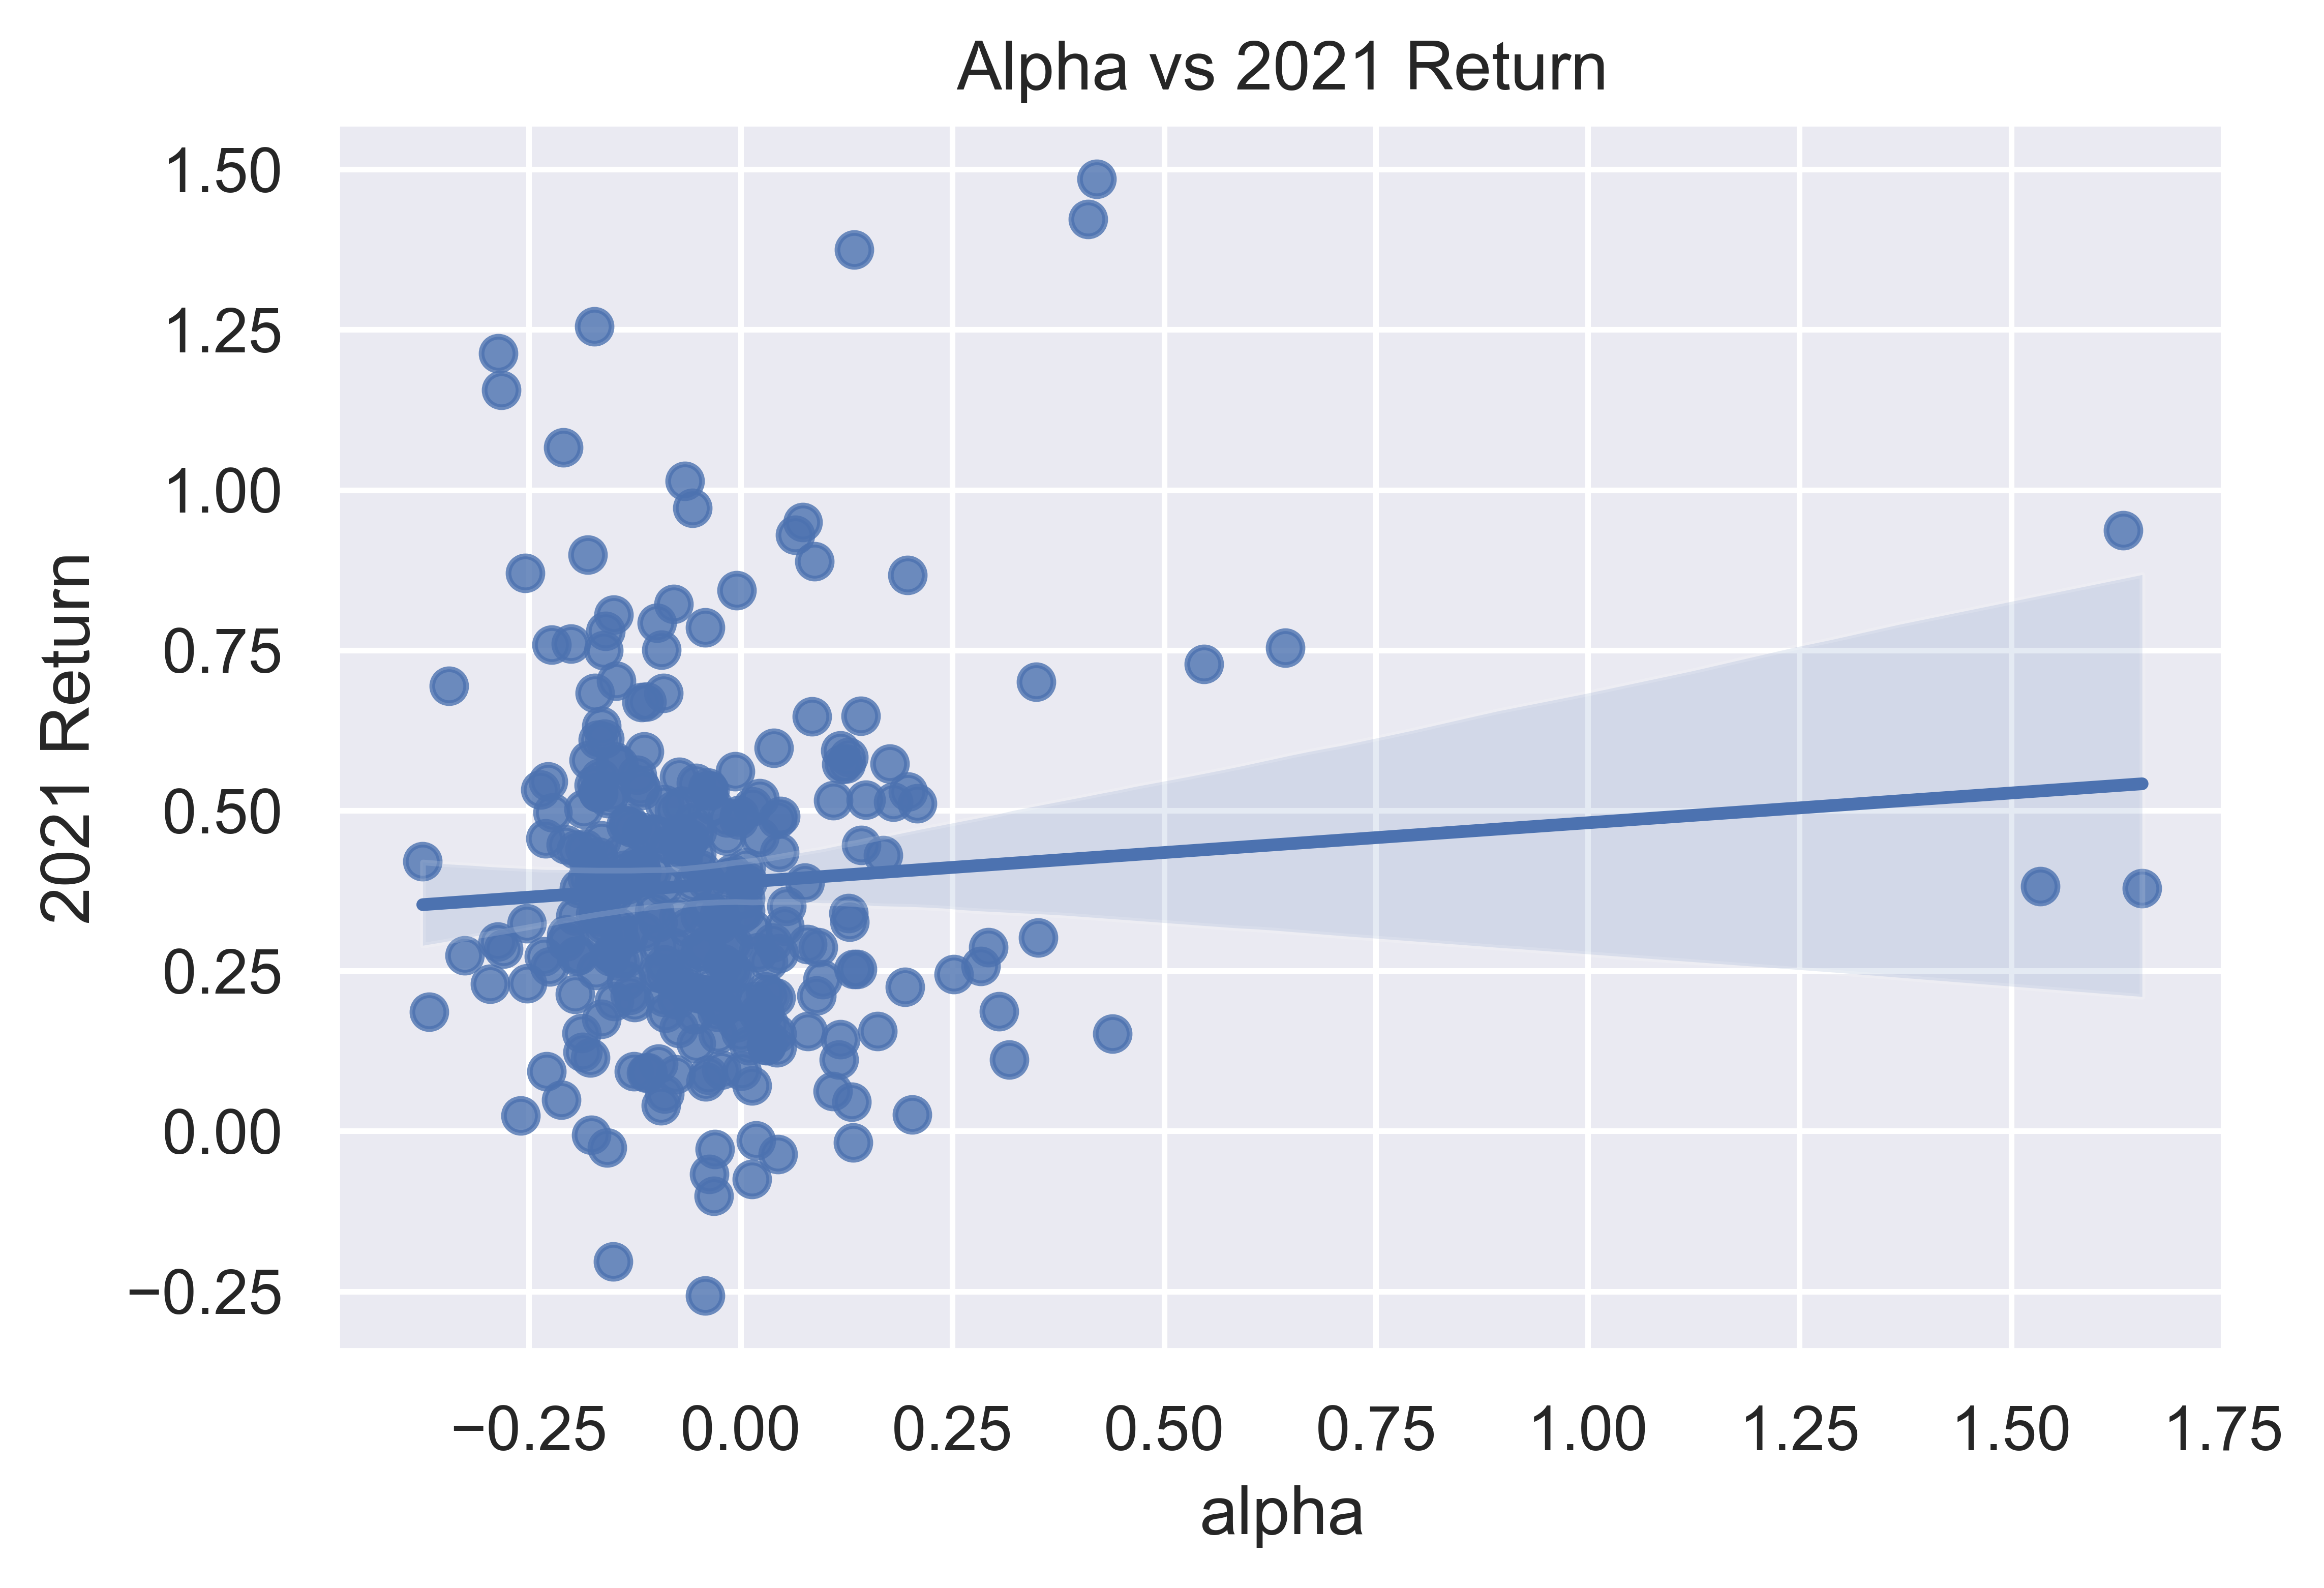

In [50]:
sns.regplot(x = "alpha", y = "2021 Return", data = df).set(title = "Alpha vs 2021 Return")

As seen in the plot above, there doesn't seem to be a strong relationship between a high alpha and a high 2021 return


In [51]:
df.to_csv("HeaderGroup10.csv")